## Collaborative Filtering for a Job Recommender System

##### Authored By: Fatima Azmat, Nathan Dignazio, and Launa Greer

### **Import Required Libraries**

In [1]:
from cf_client import JobAppDatasets
import warnings

### **Initialize Notebook Settings**

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#%matplotlib notebook  --> Uncomment to make CSR matrix preview interactive
%load_ext autoreload
%autoreload 2

### **Load and Preview Datasets**

The data is sourced from CareerBuilder.com's [Job Recommendation Challenge](https://www.kaggle.com/c/job-recommendation/data), hosted on Kaggle in 2012.

In [4]:
datasets = JobAppDatasets()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0


,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009


,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59


,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer


,Window,Train Start,Train End / Test Start,Test End
0,1,2012-04-01 00:00:00,2012-04-10 00:00:00,2012-04-14 00:00:00
1,2,2012-04-14 00:00:00,2012-04-23 00:00:00,2012-04-27 00:00:00
2,3,2012-04-27 00:00:00,2012-05-06 00:00:00,2012-05-10 00:00:00
3,4,2012-05-10 00:00:00,2012-05-19 00:00:00,2012-05-23 00:00:00
4,5,2012-05-23 00:00:00,2012-06-01 00:00:00,2012-06-05 00:00:00
5,6,2012-06-05 00:00:00,2012-06-14 00:00:00,2012-06-18 00:00:00
6,7,2012-06-18 00:00:00,2012-06-27 00:00:00,2012-07-01 00:00:00


### **Build Train and Test Sets**

In [5]:
train, test = datasets.create_train_and_test_sets(
        window_id=1, 
        users_as_rows=True,
        app_threshold=5,
        pct_test=0.2, 
        seed=None,
        random_mask=True)

,count
UserID,
296500,2473
1127206,1157
447922,953
985229,426
853630,304
...,...
962481,5
606686,5
606836,5


#### Preview and Summarize Training Matrix

In [6]:
datasets.summarize_csr_matrix(train)

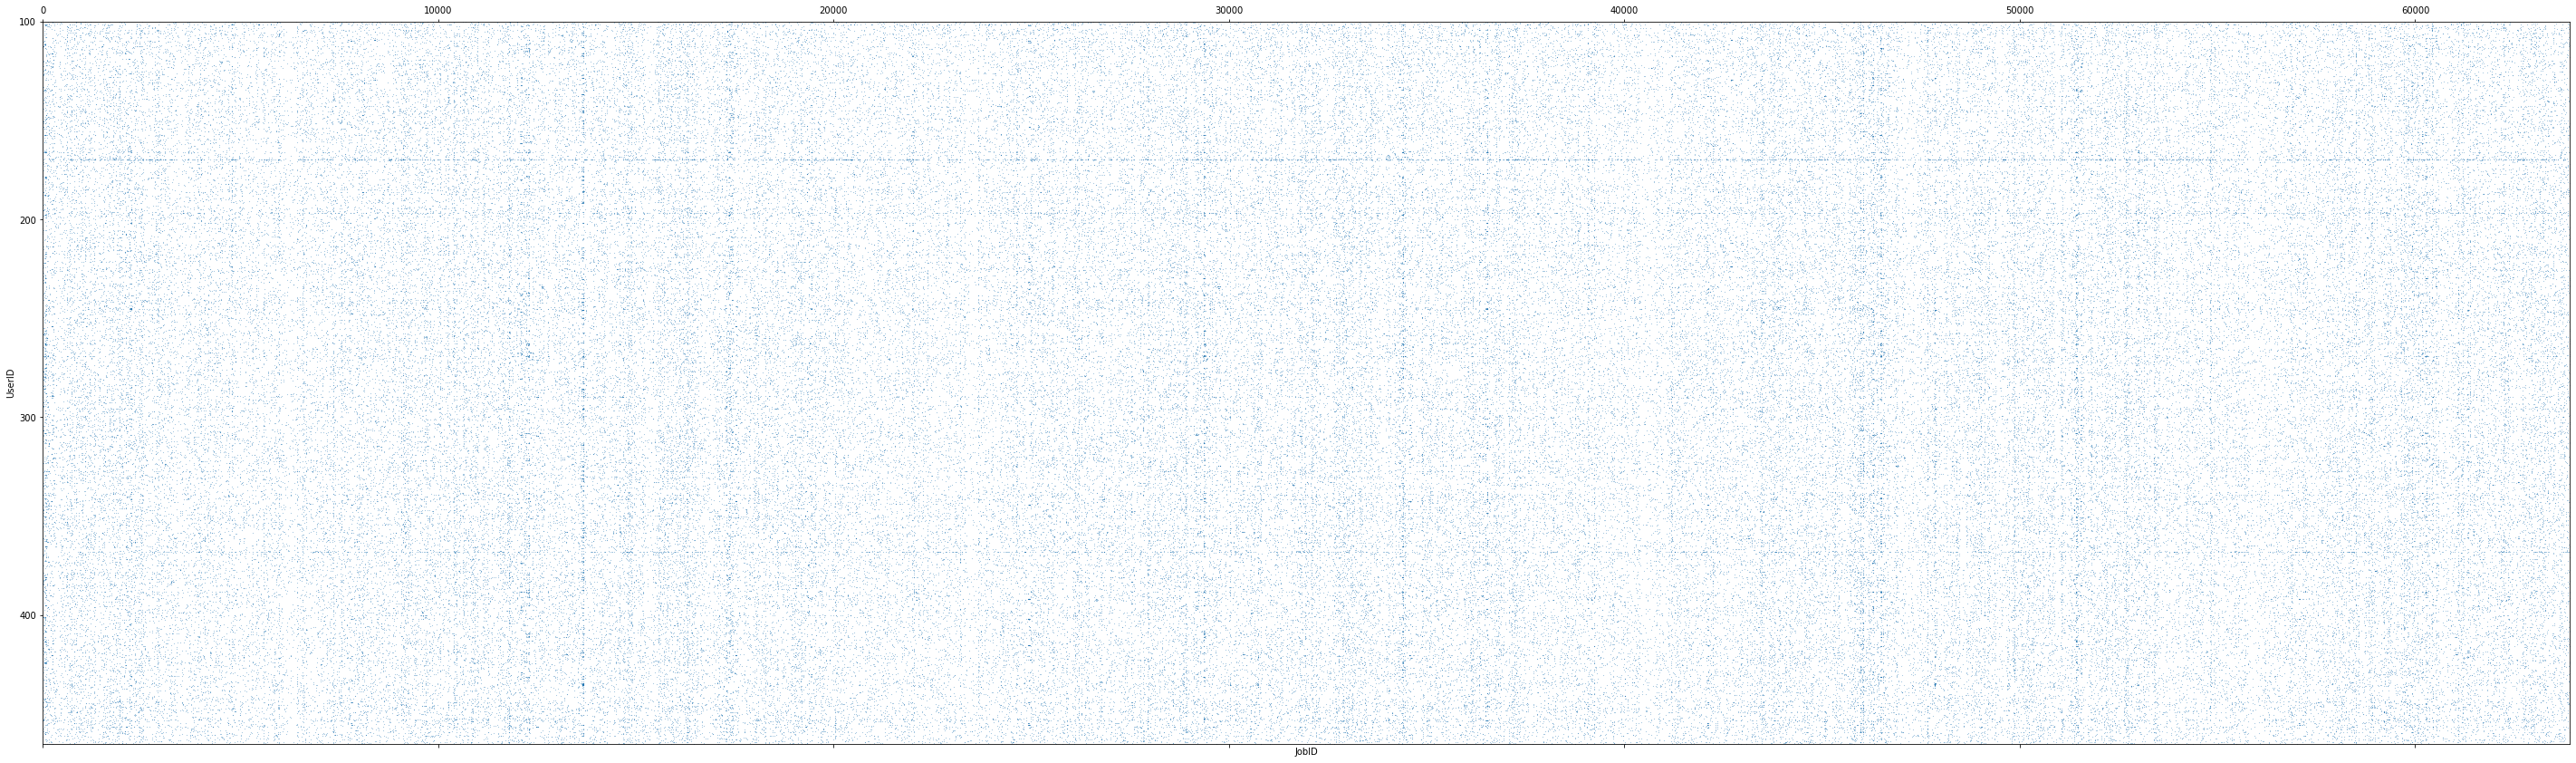

In [7]:
datasets.preview_csr_matrix(train)

In [8]:
datasets.summarize_csr_matrix(test)

#### Preview and Summarize Test Matrix

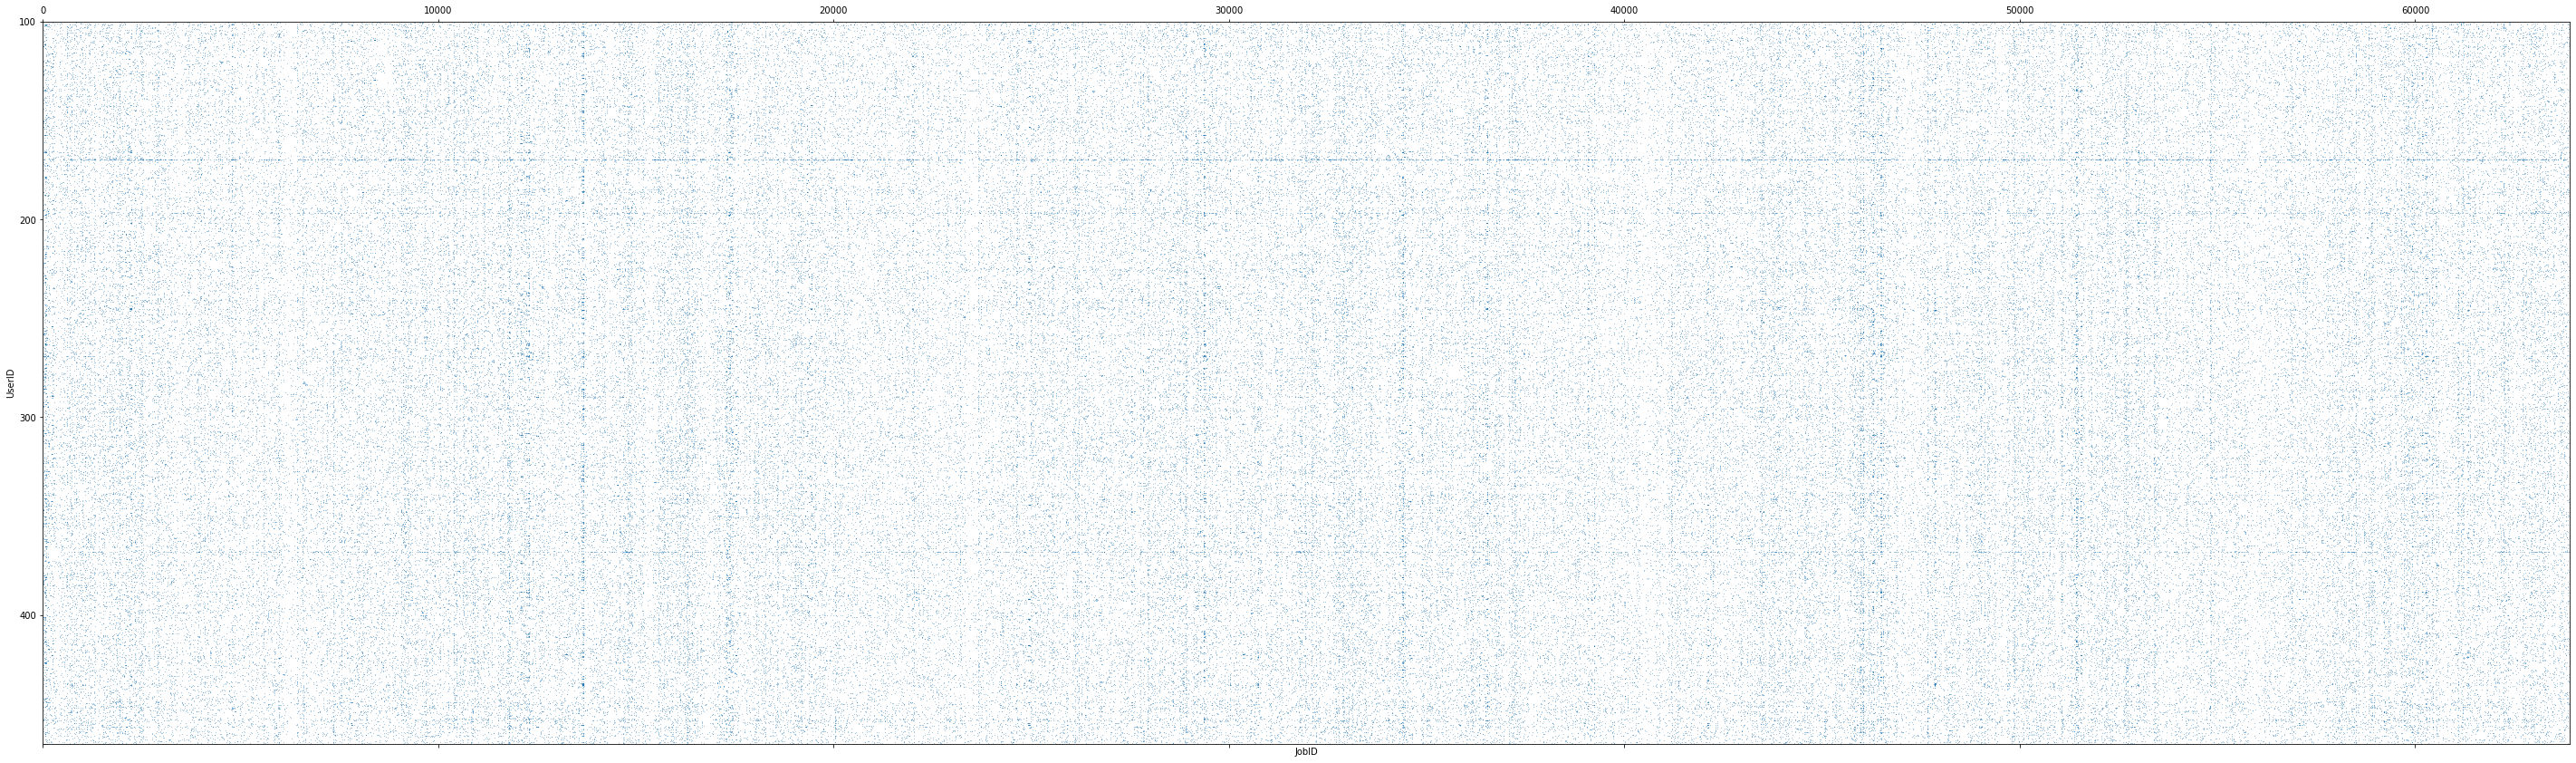

In [9]:
datasets.preview_csr_matrix(test)

### **Perform Cross Validation**